Part 1: Prepare the Data


Part 2: Apply Dimensionality Reduction


Part 3: Perform a Cluster Analysis with K-means


Part 4: Make a Recommendation

In [35]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Part 1: Prepare the Data
1. Read myopia.csv into a Pandas DataFrame.
2. Remove the "MYOPIC" column from the dataset.
Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!
3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [2]:
df = pd.read_csv('myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [4]:
df_new = df.drop(columns=["MYOPIC"])
df_new.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new)

Part 2: Apply Dimensionality Reduction
1. Perform dimensionality reduction with PCA. How did the number of the features change?

Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

3. Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [6]:
pca = PCA(n_components=0.90)
pca_myopia = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [9]:
pca_myopia.shape

(618, 10)

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(pca_myopia)
tsne_features.shape

(618, 2)

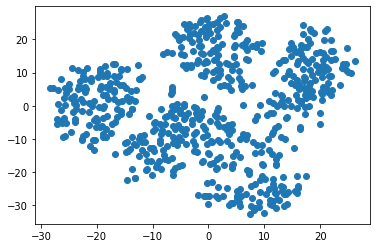

In [16]:
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [23]:
labels = df["MYOPIC"]
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

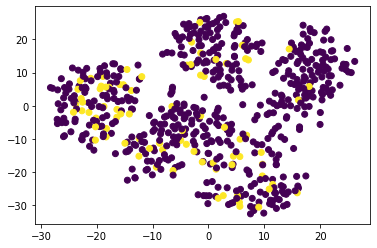

In [29]:
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=labels)
plt.show()

Part 3: Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters. Make sure to do the following:
Use a for loop to determine the inertia for each k between 1 through 10.
If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [37]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,247745.921875
1,2,138578.887076
2,3,75563.662770
3,4,55346.573716
4,5,38328.776113
5,6,31898.152427
6,7,27079.803011
7,8,23586.464802
8,9,20269.967409
9,10,17632.083420


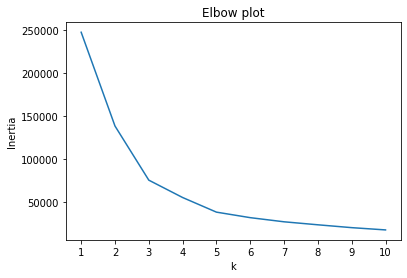

In [39]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

Part 4: Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?
Yes, 5 separate groups.